# Covid-19 Data Analysis India

In [77]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

%matplotlib inline
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.datasets import load_digits, load_iris
from sklearn.feature_selection import SelectKBest,chi2 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [78]:
covid = pd.read_csv('covid_19_india.csv', parse_dates=['Date'],dayfirst=True)

In [79]:
covid.info()                                                             #Information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14654 entries, 0 to 14653
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       14654 non-null  int64         
 1   Date                      14654 non-null  datetime64[ns]
 2   Time                      14654 non-null  object        
 3   State/UnionTerritory      14654 non-null  object        
 4   ConfirmedIndianNational   14654 non-null  object        
 5   ConfirmedForeignNational  14654 non-null  object        
 6   Cured                     14654 non-null  int64         
 7   Deaths                    14654 non-null  int64         
 8   Confirmed                 14654 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.0+ MB


In [80]:
covid.isnull().sum()                                                #null value of data

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [81]:
covid

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
14649,14650,2021-05-07,8:00 AM,Telangana,-,-,405164,2625,481640
14650,14651,2021-05-07,8:00 AM,Tripura,-,-,34153,404,36849
14651,14652,2021-05-07,8:00 AM,Uttarakhand,-,-,154147,3293,220351
14652,14653,2021-05-07,8:00 AM,Uttar Pradesh,-,-,1151571,14501,1425916


In [82]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [83]:
covid.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
14649,14650,2021-05-07,8:00 AM,Telangana,-,-,405164,2625,481640
14650,14651,2021-05-07,8:00 AM,Tripura,-,-,34153,404,36849
14651,14652,2021-05-07,8:00 AM,Uttarakhand,-,-,154147,3293,220351
14652,14653,2021-05-07,8:00 AM,Uttar Pradesh,-,-,1151571,14501,1425916
14653,14654,2021-05-07,8:00 AM,West Bengal,-,-,800328,11964,935066


In [84]:
#shorting names
covid = covid[['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed']]
covid.columns=['date', 'state', 'cured', 'deaths', 'confirmed']

In [85]:
covid.head()                                                    

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [86]:
covid.tail()

,date,state,cured,deaths,confirmed
14649,2021-05-07,Telangana,405164,2625,481640
14650,2021-05-07,Tripura,34153,404,36849
14651,2021-05-07,Uttarakhand,154147,3293,220351
14652,2021-05-07,Uttar Pradesh,1151571,14501,1425916
14653,2021-05-07,West Bengal,800328,11964,935066


In [88]:
covid["state"].describe()

count      14654
unique        40
top       Kerala
freq         464
Name: state, dtype: object

In [89]:
covid.state.value_counts() 

Kerala                                      464
Delhi                                       432
Rajasthan                                   431
Haryana                                     430
Uttar Pradesh                               430
Tamil Nadu                                  427
Ladakh                                      427
Telengana                                   426
Punjab                                      425
Karnataka                                   425
Jammu and Kashmir                           425
Maharashtra                                 425
Andhra Pradesh                              422
Uttarakhand                                 419
Odisha                                      418
West Bengal                                 416
Puducherry                                  416
Chhattisgarh                                415
Chandigarh                                  415
Gujarat                                     414
Himachal Pradesh                        

In [90]:
covid.state.unique().shape                               # unique value of state

(40,)

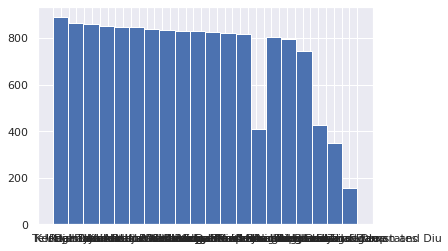

In [91]:
covid["state"].hist(bins=20)

In [17]:
covid["cured"].describe()                              # describe cured value

count    1.465400e+04
mean     1.636283e+05
std      3.345287e+05
min      0.000000e+00
25%      1.459000e+03
50%      1.774950e+04
75%      1.958365e+05
max      4.227940e+06
Name: cured, dtype: float64

In [18]:
covid.cured.value_counts()                                      #value counts of cured

0         727
1         209
2          94
3          76
33         52
         ... 
13876       1
590292      1
32317       1
173630      1
740061      1
Name: cured, Length: 11108, dtype: int64

In [19]:
covid.cured.unique().shape                                        #unique value of cured

(11108,)

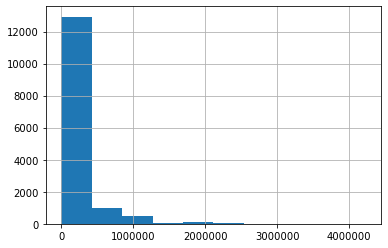

In [20]:
covid["cured"].hist(bins=10)

In [21]:
covid["deaths"].describe()

count    14654.000000
mean      2588.089327
std       6867.028449
min          0.000000
25%         11.000000
50%        345.000000
75%       1979.000000
max      73515.000000
Name: deaths, dtype: float64

In [22]:
covid.deaths.value_counts() 

0        1718
1         527
2         417
3         195
4         149
         ... 
8743        1
21033       1
8759        1
4665        1
10235       1
Name: deaths, Length: 4820, dtype: int64

In [23]:
covid.deaths.unique().shape 

(4820,)

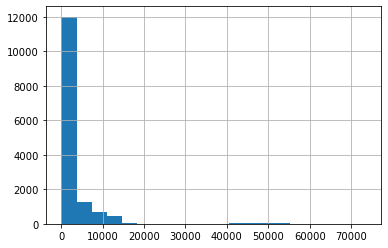

In [24]:
covid["deaths"].hist(bins=20)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


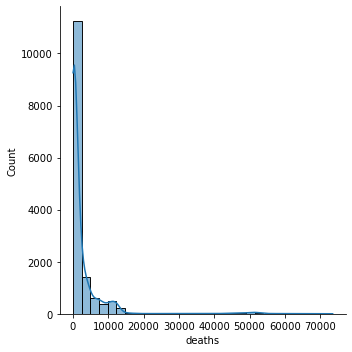

In [25]:
sns.displot(covid.deaths,bins=30,kde=True)

In [26]:
today = covid[covid.date=='2021-05-07']

In [27]:
today.shape

(36, 5)

In [28]:
today.head()

,date,state,cured,deaths,confirmed
14618,2021-05-07,Andaman and Nicobar Islands,5958,72,6255
14619,2021-05-07,Andhra Pradesh,1037411,8446,1228186
14620,2021-05-07,Arunachal Pradesh,17717,59,19634
14621,2021-05-07,Assam,242980,1531,277687
14622,2021-05-07,Bihar,435574,3077,553803


In [29]:
today.tail()

,date,state,cured,deaths,confirmed
14649,2021-05-07,Telangana,405164,2625,481640
14650,2021-05-07,Tripura,34153,404,36849
14651,2021-05-07,Uttarakhand,154147,3293,220351
14652,2021-05-07,Uttar Pradesh,1151571,14501,1425916
14653,2021-05-07,West Bengal,800328,11964,935066


In [30]:
#sorting data along with confirmed cases
max_confirmed_cases=today.sort_values(by='confirmed', ascending=False)

In [31]:
max_confirmed_cases.head(10)

,date,state,cured,deaths,confirmed
14638,2021-05-07,Maharashtra,4227940,73515,4942736
14633,2021-05-07,Karnataka,1255797,17212,1790104
14634,2021-05-07,Kerala,1389515,5628,1786396
14652,2021-05-07,Uttar Pradesh,1151571,14501,1425916
14648,2021-05-07,Tamil Nadu,1151058,14974,1297500
14626,2021-05-07,Delhi,1164008,18398,1273035
14619,2021-05-07,Andhra Pradesh,1037411,8446,1228186
14653,2021-05-07,West Bengal,800328,11964,935066
14624,2021-05-07,Chhattisgarh,675294,9950,816489
14646,2021-05-07,Rajasthan,499376,5182,702568


In [32]:
top_states_confirmed = max_confirmed_cases[0:10]

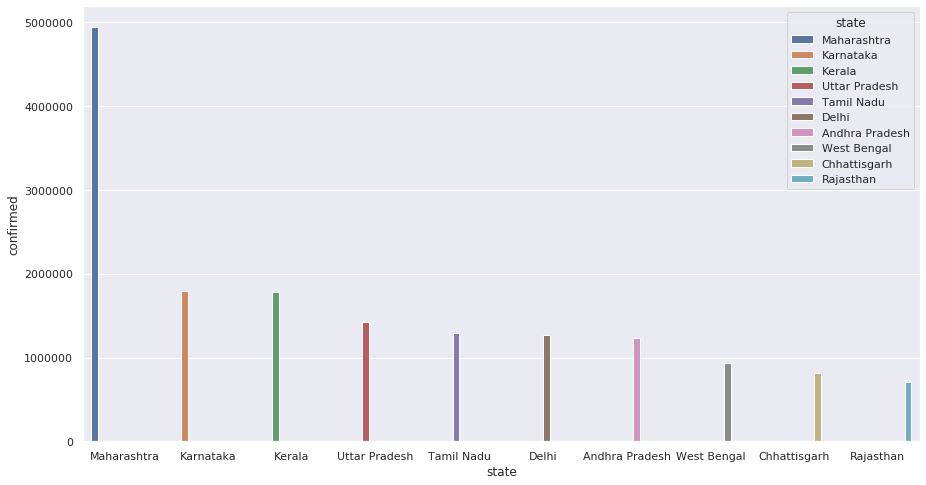

In [33]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed,hue="state")
plt.show()

In [34]:
max_death_cases=today.sort_values(by='deaths', ascending=False)

In [35]:
max_death_cases.head()

,date,state,cured,deaths,confirmed
14638,2021-05-07,Maharashtra,4227940,73515,4942736
14626,2021-05-07,Delhi,1164008,18398,1273035
14633,2021-05-07,Karnataka,1255797,17212,1790104
14648,2021-05-07,Tamil Nadu,1151058,14974,1297500
14652,2021-05-07,Uttar Pradesh,1151571,14501,1425916


In [36]:
top_states_death = max_death_cases[0:10]

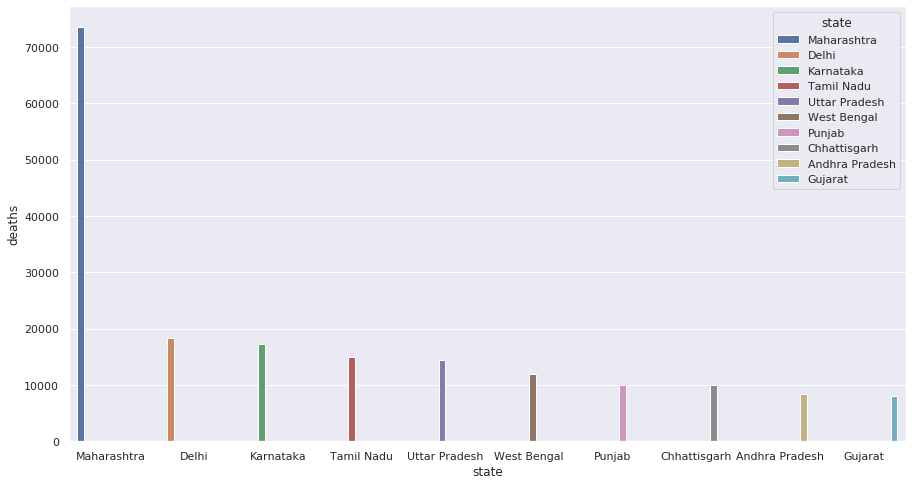

In [37]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x="state",y="deaths",data=top_states_death,hue="state")
plt.show()

In [38]:
max_cured_cases=today.sort_values(by='cured', ascending=False)

In [39]:
max_cured_cases.head()

,date,state,cured,deaths,confirmed
14638,2021-05-07,Maharashtra,4227940,73515,4942736
14634,2021-05-07,Kerala,1389515,5628,1786396
14633,2021-05-07,Karnataka,1255797,17212,1790104
14626,2021-05-07,Delhi,1164008,18398,1273035
14652,2021-05-07,Uttar Pradesh,1151571,14501,1425916


In [40]:
top_states_cured = max_cured_cases[0:10]

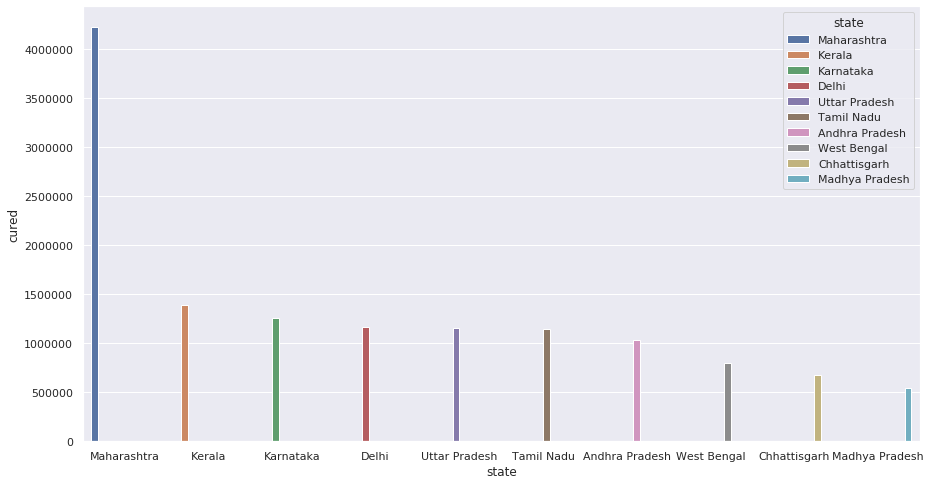

In [41]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x="state",y="cured",data=top_states_cured,hue="state")
plt.show()

In [42]:
maha = covid[covid.state=="Maharashtra"]

In [43]:
maha.shape

(425, 5)

In [44]:
maha.head()

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14


In [45]:
maha.tail()

,date,state,cured,deaths,confirmed
14494,2021-05-03,Maharashtra,3981658,70284,4722401
14530,2021-05-04,Maharashtra,4041158,70851,4771022
14566,2021-05-05,Maharashtra,4107092,71742,4822902
14602,2021-05-06,Maharashtra,4164098,72662,4880542
14638,2021-05-07,Maharashtra,4227940,73515,4942736


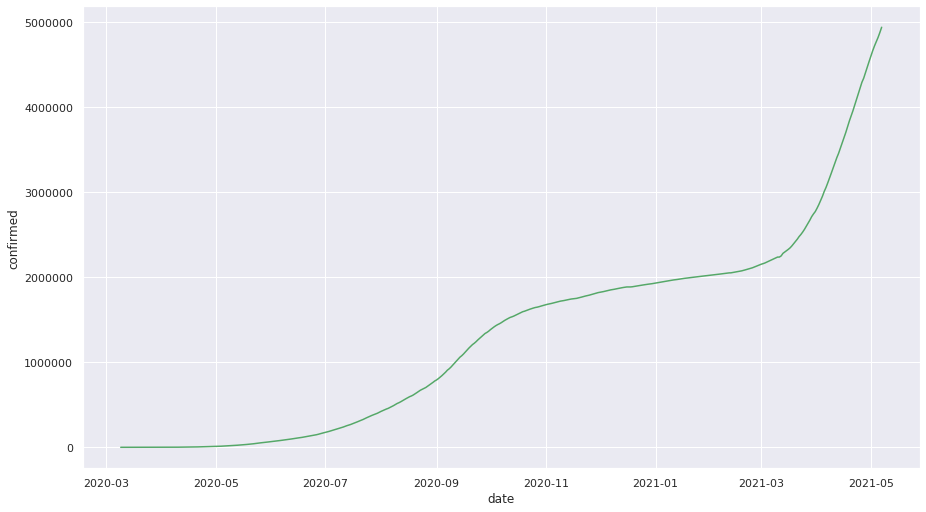

In [46]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="confirmed",data=maha,color="g")
plt.show()

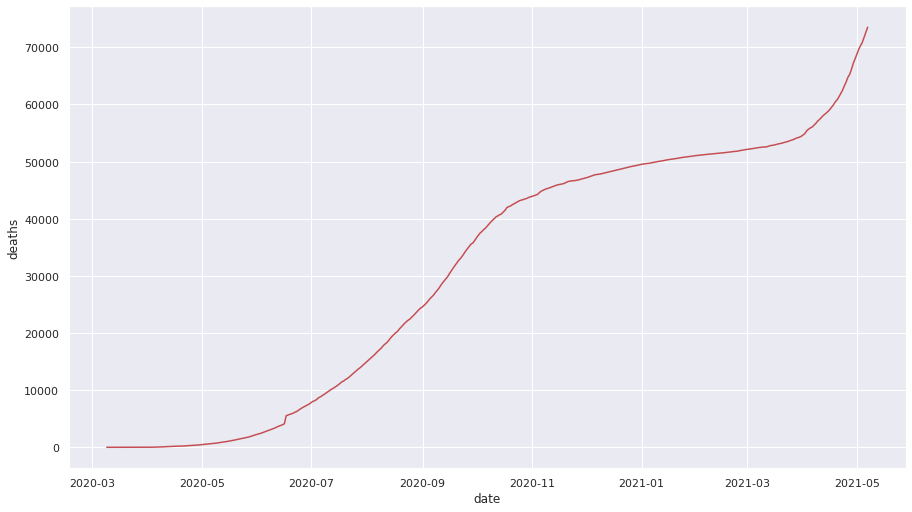

In [47]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="deaths",data=maha,color="r")
plt.show()

In [48]:
Kerala = covid[covid.state=="Kerala"]

In [49]:
Kerala.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [50]:
Kerala.tail()

,date,state,cured,deaths,confirmed
14490,2021-05-03,Kerala,1293590,5405,1638778
14526,2021-05-04,Kerala,1313109,5450,1664789
14562,2021-05-05,Kerala,1339257,5507,1701979
14598,2021-05-06,Kerala,1362363,5565,1743932
14634,2021-05-07,Kerala,1389515,5628,1786396


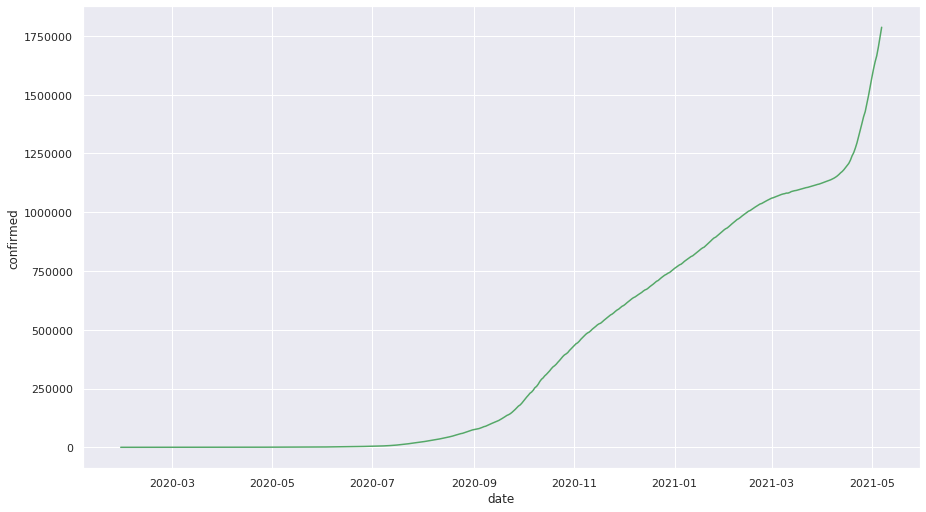

In [51]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="confirmed",data=Kerala,color="g")
plt.show()

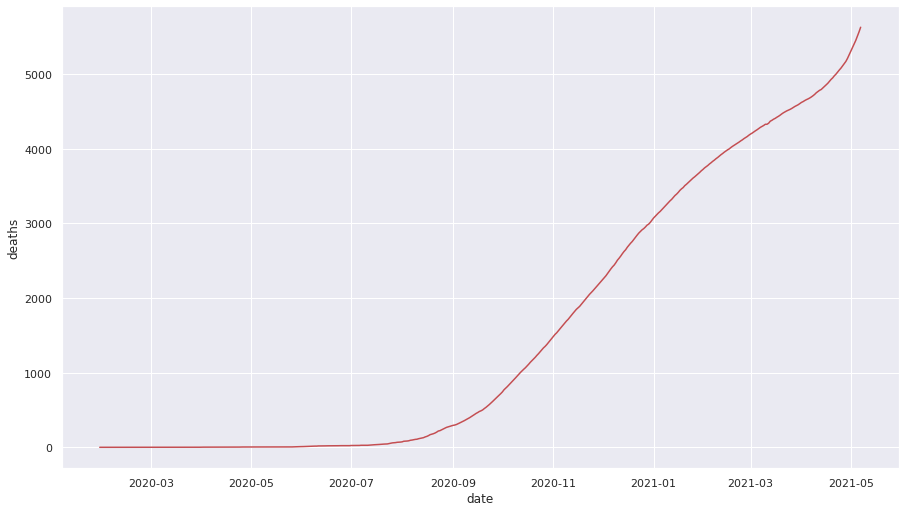

In [52]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="deaths",data=Kerala,color="r")
plt.show()

In [53]:
jk = covid[covid.state=="Jammu and Kashmir"]

In [54]:
jk.head()

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1


In [55]:
jk.tail()

,date,state,cured,deaths,confirmed
14487,2021-05-03,Jammu and Kashmir,148695,2370,183486
14523,2021-05-04,Jammu and Kashmir,150231,2421,187219
14559,2021-05-05,Jammu and Kashmir,152109,2458,191869
14595,2021-05-06,Jammu and Kashmir,154447,2510,196585
14631,2021-05-07,Jammu and Kashmir,157283,2562,201511


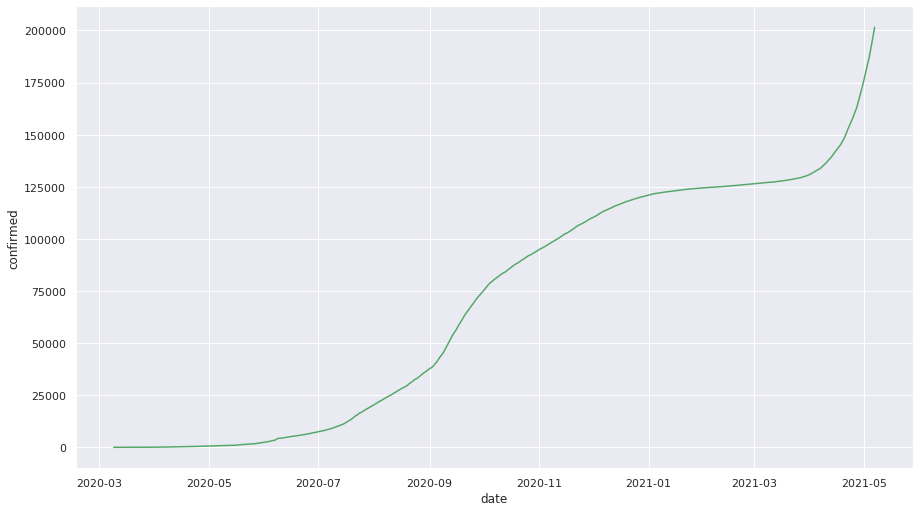

In [56]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="confirmed",data=jk,color="g")
plt.show()

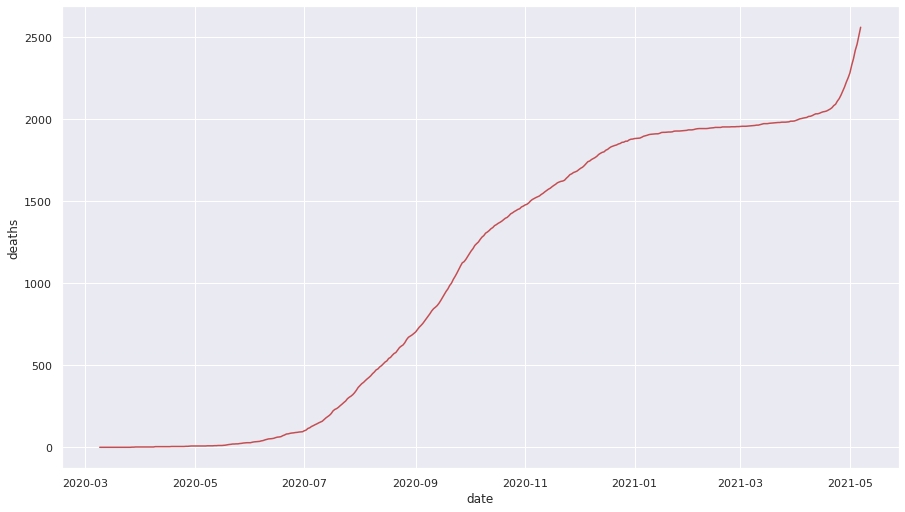

In [57]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x="date",y="deaths",data=jk,color="r")
plt.show()

## Testing

In [92]:
tests = pd.read_csv('StatewiseTestingDetails.csv')
tests

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
12983,2021-05-02,West Bengal,10545059.0,NaN,NaN
12984,2021-05-03,West Bengal,10600346.0,NaN,NaN
12985,2021-05-04,West Bengal,10658094.0,NaN,NaN
12986,2021-05-05,West Bengal,10717613.0,NaN,NaN


In [93]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          12988 non-null  object 
 1   State         12988 non-null  object 
 2   TotalSamples  12988 non-null  float64
 3   Negative      5986 non-null   object 
 4   Positive      5408 non-null   float64
dtypes: float64(2), object(3)
memory usage: 507.5+ KB


In [94]:
tests.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        7002
Positive        7580
dtype: int64

In [95]:
tests

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
12983,2021-05-02,West Bengal,10545059.0,NaN,NaN
12984,2021-05-03,West Bengal,10600346.0,NaN,NaN
12985,2021-05-04,West Bengal,10658094.0,NaN,NaN
12986,2021-05-05,West Bengal,10717613.0,NaN,NaN


In [96]:
tests.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [97]:
tests.tail()

,Date,State,TotalSamples,Negative,Positive
12983,2021-05-02,West Bengal,10545059.0,NaN,NaN
12984,2021-05-03,West Bengal,10600346.0,NaN,NaN
12985,2021-05-04,West Bengal,10658094.0,NaN,NaN
12986,2021-05-05,West Bengal,10717613.0,NaN,NaN
12987,2021-05-06,West Bengal,10777718.0,NaN,NaN


In [98]:
test_latest = tests[tests.Date == '2021-05-11']

In [99]:
test_latest

,Date,State,TotalSamples,Negative,Positive


In [100]:
#Sorting data w.r.t number of cured cases
max_tests_State=test_latest.sort_values(by="TotalSamples",ascending=False)
max_tests_State

,Date,State,TotalSamples,Negative,Positive


## Future Prediction

In [67]:
#
from sklearn.model_selection import train_test_split

In [68]:
maha['date']=maha['date'].map(dt.datetime.toordinal)

<ipython-input-68-595f711d6bae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal)


In [69]:
maha.head()

,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [70]:
x=maha['date']
y=maha['confirmed']

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf = RandomForestRegressor()

In [74]:
rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

<ipython-input-74-ccb1599f9545>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))


RandomForestRegressor()

In [75]:
rf.predict([[737498]])

array([15.59])